<h1>Binary Classification Problem</h1>

In [1]:
import numpy as np    
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("wdbc.data")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'wdbc.data'

In [4]:
data.head()

,ID number,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.columns

Index(['ID number', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave points1',
       'symmetry1', 'fractal dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave points2',
       'symmetry2', 'fractal dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave points3',
       'symmetry3', 'fractal dimension3'],
      dtype='object')

In [6]:
x_train = data[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave points1', 'symmetry1', 'fractal dimension1']]
y_train = data['Diagnosis']

In [7]:
x=x_train.values
y=y_train.values

<h3>To plot data</h3>

In [10]:
def plot_data(X, y, i,j, pos_label="y=1", neg_label="y=0"):
    positive = y == 'M'
    negative = y == 'B'
    
    # Plot examples
    plt.plot(X[positive, i], X[positive, j], 'k+', label=pos_label)
    plt.plot(X[negative, i], X[negative, j], 'yx', label=neg_label)

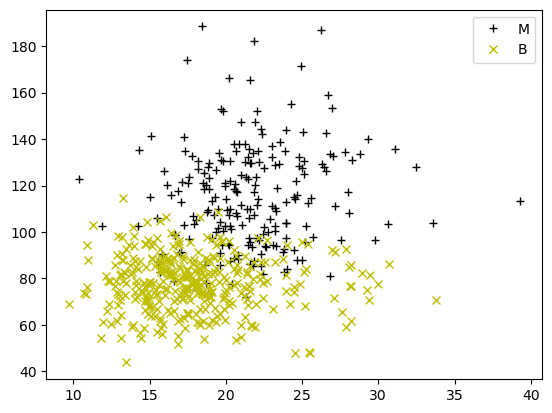

In [11]:
plot_data(x, y[:],1,2, pos_label="M", neg_label="B")
plt.legend(loc="upper right")

In [12]:
m=y.shape[0]
Y=[]
for i in range(m):
    if y[i]=='M':
        Y.append(1)
    else:
        Y.append(0)

<h3>To calculate Sigmoid function</h3>

In [13]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1/(1+np.exp(-z)) 
    
    return g

<h3>To Calculate Total Cost</h3>
J(w,b)=i/2m(sum(f(x[i]-y[i])^2))

In [23]:
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
    epsilon = 1e-8  # Small value to avoid logarithm of zero
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb + epsilon) - (1 - y[i]) * np.log(1 - f_wb + epsilon)
    total_cost = cost/m
    return total_cost

<h3>To compute Gradient of w and b</h3>

In [24]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
    return dj_db, dj_dw

<h3>To Compute Gradient Descent</h3>

In [25]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    print(type(y))
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history

<h3>Fitting Data</h3>

In [51]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(10).reshape(-1,1) - 0.5)
#intial_w =np.zeros(10)
initial_b = -6
print(intial_w)

# Some gradient descent settings
iterations = 10000
alpha = 0.00001

w,b, J_history,_ = gradient_descent(x ,Y,intial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

[[-0.00082978]
 [ 0.00220324]
 [-0.00499886]
 [-0.00197667]
 [-0.00353244]
 [-0.00407661]
 [-0.0031374 ]
 [-0.00154439]
 [-0.00103233]
 [ 0.00038817]]
<class 'list'>
Iteration    0: Cost     1.82   
Iteration 1000: Cost     0.29   
Iteration 2000: Cost     0.29   
Iteration 3000: Cost     0.29   
Iteration 4000: Cost     0.29   
Iteration 5000: Cost     0.29   
Iteration 6000: Cost     0.29   
Iteration 7000: Cost     0.29   
Iteration 8000: Cost     0.29   
Iteration 9000: Cost     0.29   
Iteration 9999: Cost     0.29   


<h3>To Predict Data</h3>

In [54]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    ### END CODE HERE ### 
    return p

In [55]:
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')


Output of predict: shape (4,), value [0. 1. 1. 1.]


<h1>To Calculate Accuracy</h1>

In [57]:
p = predict(x, w,b)
print('Train Accuracy: %f'%(np.mean(p == Y) * 100))

Train Accuracy: 88.752197


<h1>Congrats your model's Accuracy is 88.752197</h1>